# Import Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Load all the data

In [21]:
data = pd.read_csv('insurance.csv')

df_train, df_test = train_test_split(data, random_state=42, test_size=0.2)

print(df_train.shape)
print(df_test.shape)

(1070, 7)
(268, 7)


Understand the variables

In [22]:
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values'])

for i, var in enumerate(df_train.columns):
    variables.loc[i] = [var, df_train[var].nunique, df_train[var].unique().tolist()]

variables

,Variable,Number of unique values,Values
0,age,<bound method IndexOpsMixin.nunique of 560 ...,"[46, 47, 52, 39, 54, 63, 22, 18, 40, 37, 34, 5..."
1,sex,<bound method IndexOpsMixin.nunique of 560 ...,"[female, male]"
2,bmi,<bound method IndexOpsMixin.nunique of 560 ...,"[19.95, 24.32, 24.86, 34.32, 21.47, 41.47, 24...."
3,children,<bound method IndexOpsMixin.nunique of 560 ...,"[2, 0, 5, 3, 1, 4]"
4,smoker,<bound method IndexOpsMixin.nunique of 560 ...,"[no, yes]"
5,region,<bound method IndexOpsMixin.nunique of 560 ...,"[northwest, northeast, southeast, southwest]"
6,charges,<bound method IndexOpsMixin.nunique of 560 ...,"[9193.8385, 8534.6718, 27117.99378, 8596.8278,..."


### Data Dictionary

|**variable**   |**class**  |**description**|
|---------------|-----------|---------------|
|**Results Data**|
|age            |Int        |Insured's age|
|sex            |String     |Insured's sex|
|bmi            |Float      |Insured's body mass index|
|children       |Int        |Number of children|
|smoker         |String     |Indicator if the insured's smoke|
|region         |String     |The region where the insured lives|
|charges        |Float      |How much the insured pays in premiums|

# Explatory Data Analysis (EDA)

Now let's ensure there are no nulls:

In [23]:
df_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: UserWarning: 
The palette list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])


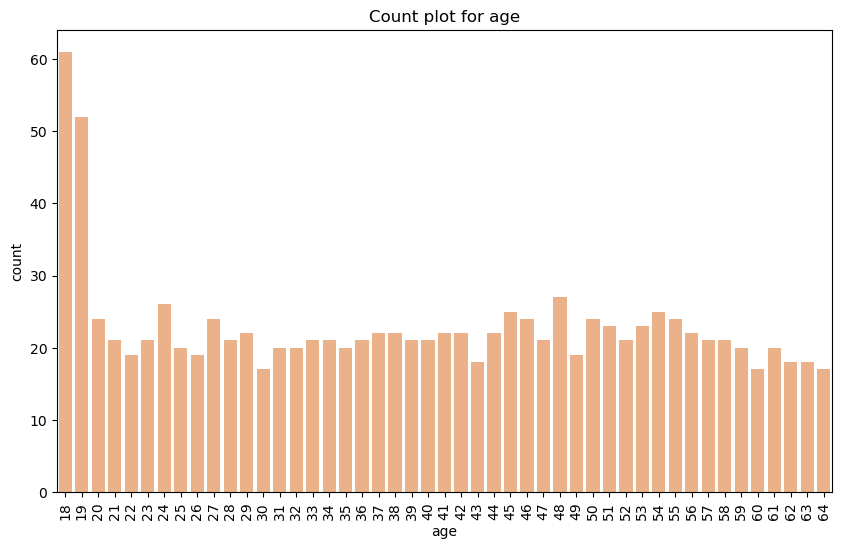

C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])


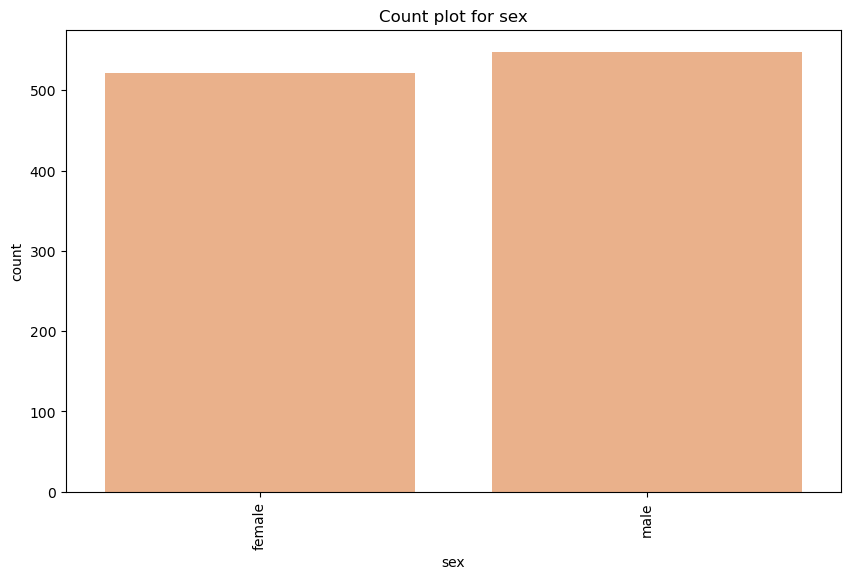

C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])


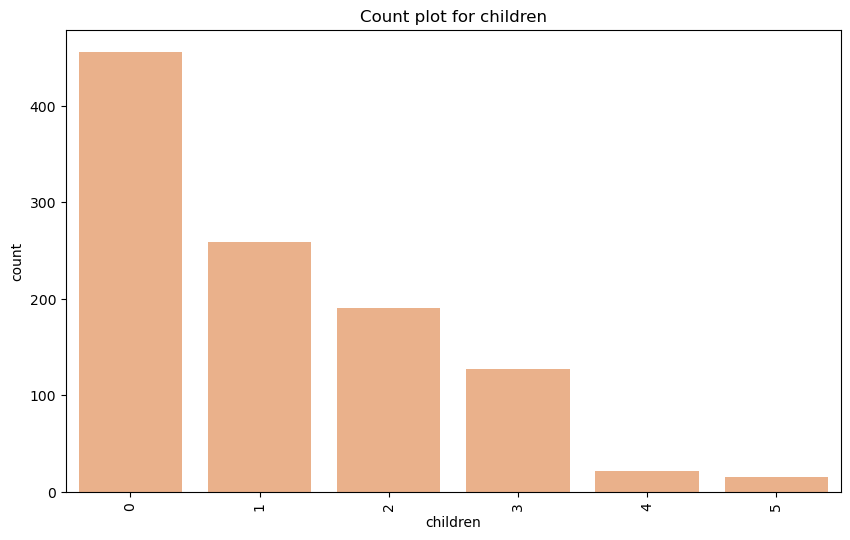

C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])


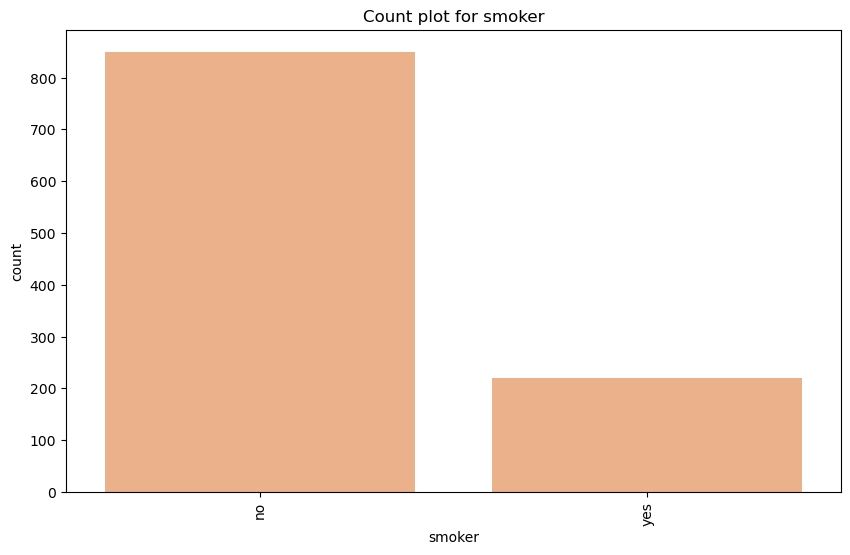

C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
C:\Users\nguye\AppData\Local\Temp\ipykernel_23676\2151092276.py:5: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])


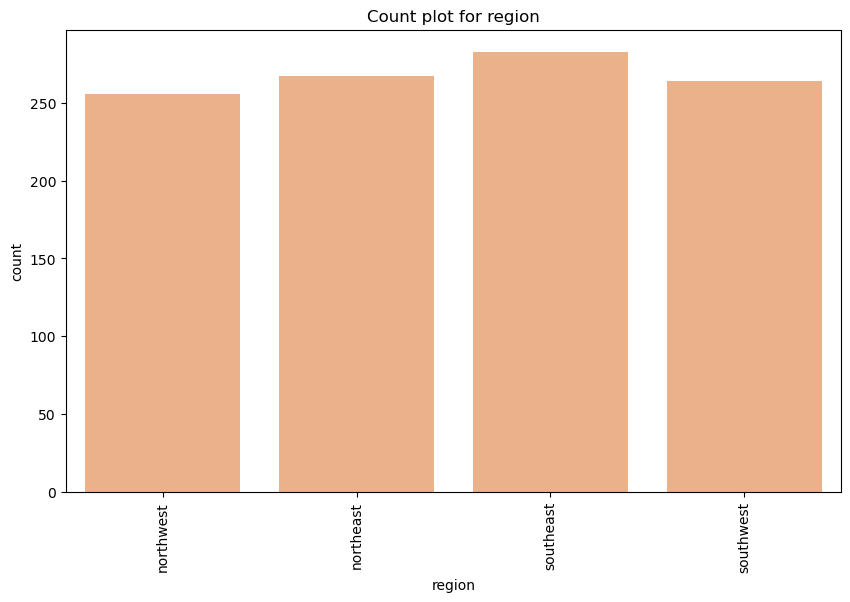

In [25]:
cols = ["age", "sex", "children", "smoker", "region"]

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x = col, data=df_train, palette=["#FAAE7B"])
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation = 90)
    plt.show()

Merge the training data with the validation data in order to do one-hot encoding and get consistent columns

In [26]:
print(df_train.shape)
print(df_test.shape)

train_res = df_train['charges']
test_res = df_test['charges']

print(df_train.columns)

df = pd.concat([df_train.drop('charges', axis=1), df_test.drop('charges', axis=1)])
df = pd.get_dummies(df)

print(df.columns)

(1070, 7)
(268, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Once that's done, we can seperate the train and test datasets back.

In [27]:
df_score_train_oh = df.iloc[:df_train.shape[0]]
df_score_test_oh = df.iloc[df_train.shape[0]:]

df_score_train_oh.insert(df_score_train_oh.shape[1], 'charges', train_res, True)
df_score_test_oh.insert(df_score_test_oh.shape[1], 'charges', test_res, True)

print(df_train.shape)
print(df_test.shape)
print(df_score_train_oh.columns)

(1070, 7)
(268, 7)
Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'charges'],
      dtype='object')


We can move on to export our data and build our prediction models in subsequent scripts.

In [28]:
prepared_path = 'prepared_data' 
if not os.path.exists(prepared_path):
    os.makedirs(prepared_path)

csv_train_data = df_score_train_oh.to_csv('prepared_data/train_data.csv')
csv_test_data = df_score_test_oh.to_csv('prepared_data/test_data.csv')